In [9]:
using DiffEqBiological;
using DifferentialEquations;
using Plots;
using Latexify;
using NumericIO;

In [11]:
const Avogadro = 6.022140857e23;
const kda_mg_conversion = 1.66054e-18;

In [12]:
const LibA_K_m = 5800; # nmol
const LibA_V_max = 0.16; # nmol/min
const NAT1_k = 68; # nmol/(min*mg), error is plus or minus 8
const NAT1_weight = 33; # kDa

In [30]:
rn_no_influx = @reaction_network begin
    mm(X, v, K), X --> Y
    k, Y --> Z
    end v K k;

In [31]:
latexify(rn_no_influx)

L"\begin{align}
\frac{dX}{dt} =&  - \frac{v \cdot X}{K + X} \cdot X \\
\frac{dY}{dt} =& \frac{v \cdot X}{K + X} \cdot X - k \cdot Y \\
\frac{dZ}{dt} =& k \cdot Y
\end{align}
"

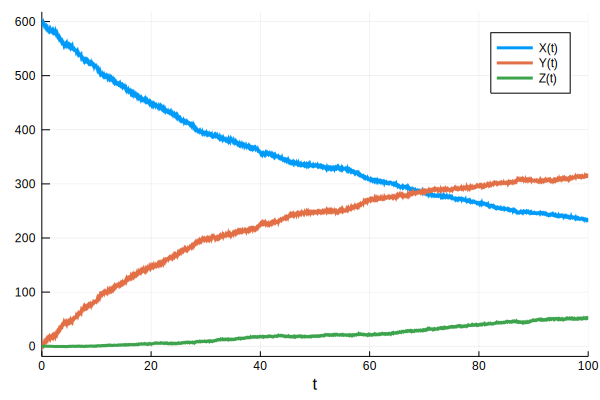

In [35]:
NAT1_conc = 1*10^(-12); # mol
NAT1_conc_factor = (NAT1_conc*Avogadro)*(NAT1_weight*kda_mg_conversion); # mg
NAT1_rate = NAT1_k*NAT1_conc_factor; # 1/min

p = (LibA_V_max, LibA_K_m, NAT1_rate);
u0 = [600., 0.001, 0.001]; # initial concentrations in nmol
tspan = (0., 100.);

sprob = SDEProblem(rn_no_influx, u0, tspan, p);
ssol = solve(sprob, EM(), dt=0.01);
plot(ssol)

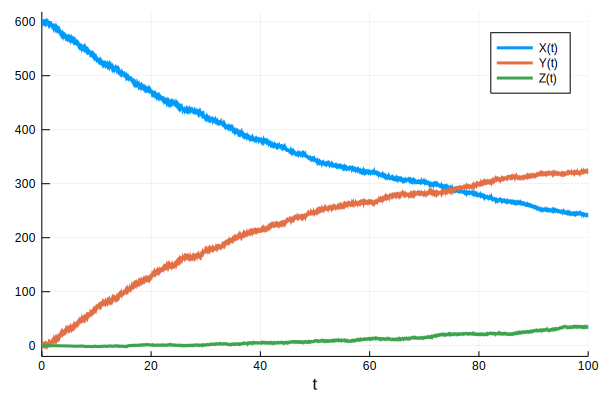

In [38]:
NAT1_conc = 1*10^(-11); # mol
NAT1_conc_factor = (NAT1_conc*Avogadro)*(NAT1_weight*kda_mg_conversion); # mg
NAT1_rate = NAT1_k*NAT1_conc_factor; # 1/min

p = (LibA_V_max, LibA_K_m, NAT1_rate);
u0 = [600., 0.001, 0.001]; # initial concentrations in nmol
tspan = (0., 1000.);

prob = SDEProblem(rn_no_influx, u0, tspan, p);
ssol = solve(sprob, EM(), dt=0.01);
plot(ssol)

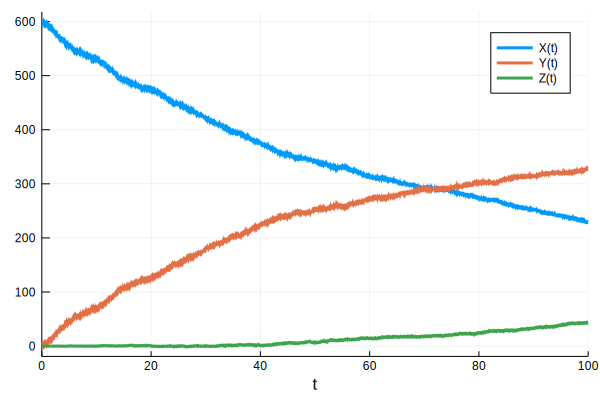

In [39]:
NAT1_conc = 1*10^(-9); # mol
NAT1_conc_factor = (NAT1_conc*Avogadro)*(NAT1_weight*kda_mg_conversion); # mg
NAT1_rate = NAT1_k*NAT1_conc_factor; # 1/min

p = (LibA_V_max, LibA_K_m, NAT1_rate);
u0 = [600., 0.001, 0.001]; # initial concentrations in nmol
tspan = (0., 1000.);

prob = SDEProblem(rn_no_influx, u0, tspan, p);
ssol = solve(sprob, EM(), dt=0.01);
plot(ssol)